In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
titanic = pd.read_csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")

titanic.head(10)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [3]:
# Check for missing values
print(titanic.isnull().sum())

# Fill missing values in 'Age' with the median age
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the most common port
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to too many missing values
titanic.drop(columns=['Cabin'], inplace=True)

# Verify the changes
print(titanic.isnull().sum())


Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


<ipython-input-3-74b8d3499b22>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


KeyError: 'Embarked'

In [7]:

print(titanic.isnull().sum())
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
if 'Embarked' in titanic.columns:
   titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
else: print("'Embarked' column not found in the DataFrame")
print(titanic.isnull().sum())

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64
'Embarked' column not found in the DataFrame
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


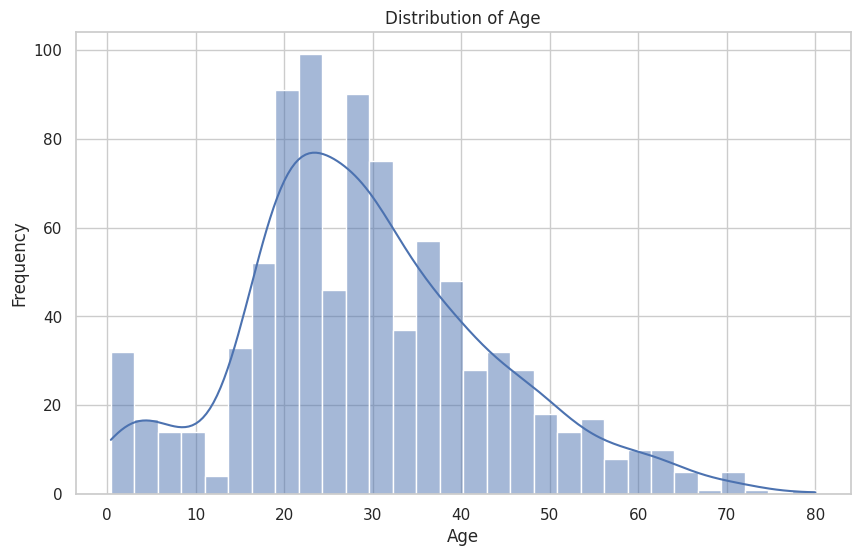

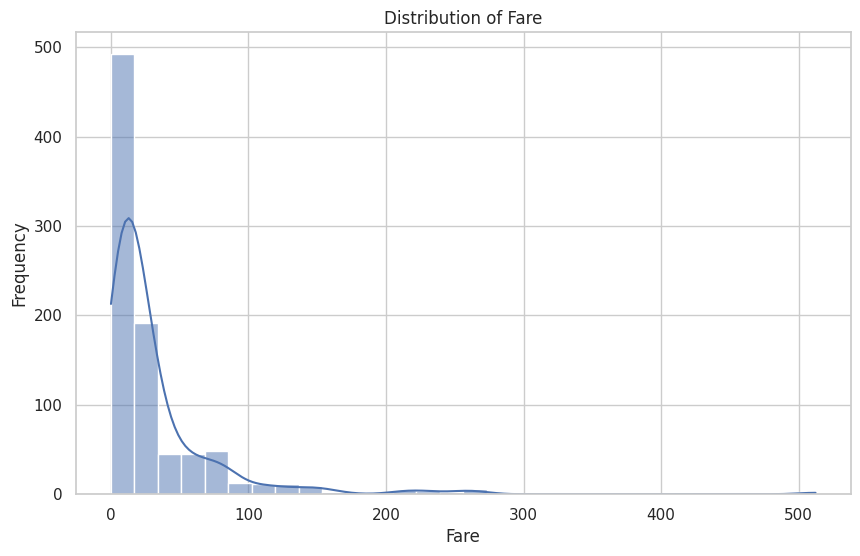

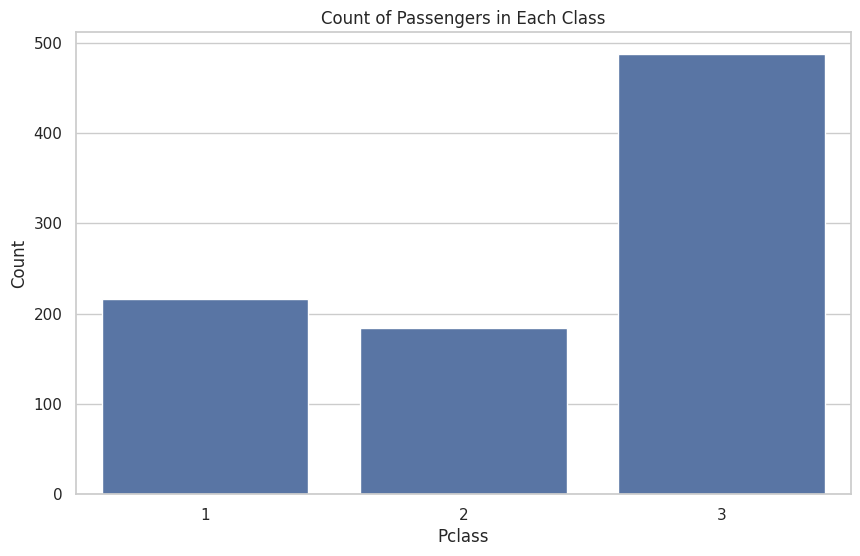

In [8]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot the distribution of the 'Age' feature
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Count plot for 'Pclass'
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=titanic)
plt.title('Count of Passengers in Each Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()


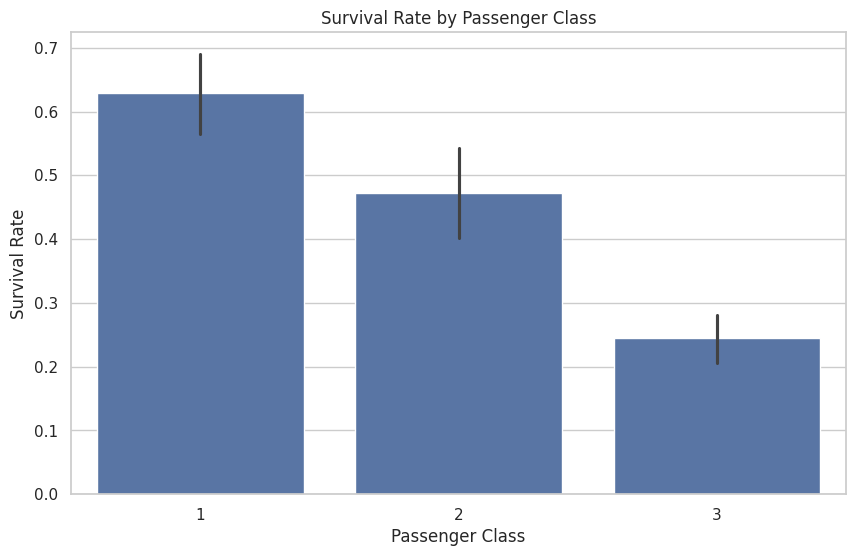

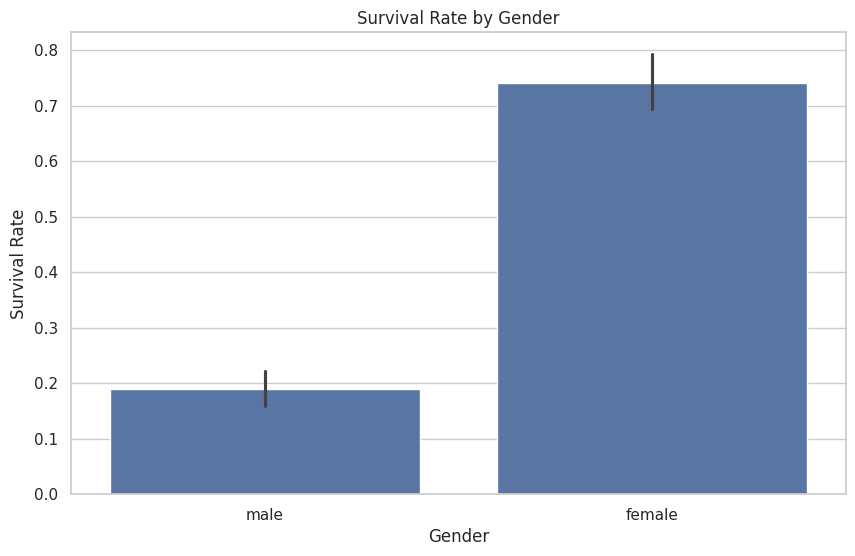

ValueError: Could not interpret value `Embarked` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [9]:
# Survival rate based on 'Pclass'
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate based on 'Sex'
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate based on 'Embarked'
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', data=titanic)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()


In [10]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: 'Mr. Owen Harris Braund'

<Figure size 1200x800 with 0 Axes>

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  
Column names in the dataset:
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spo

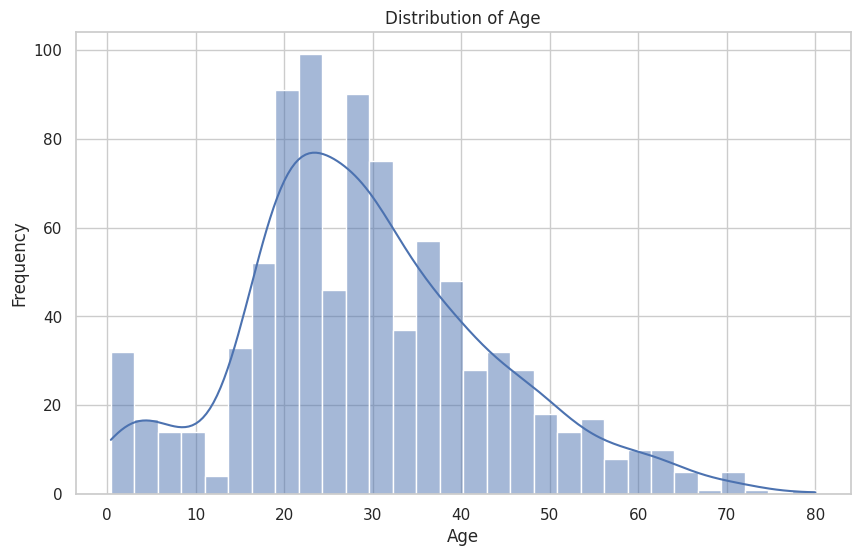

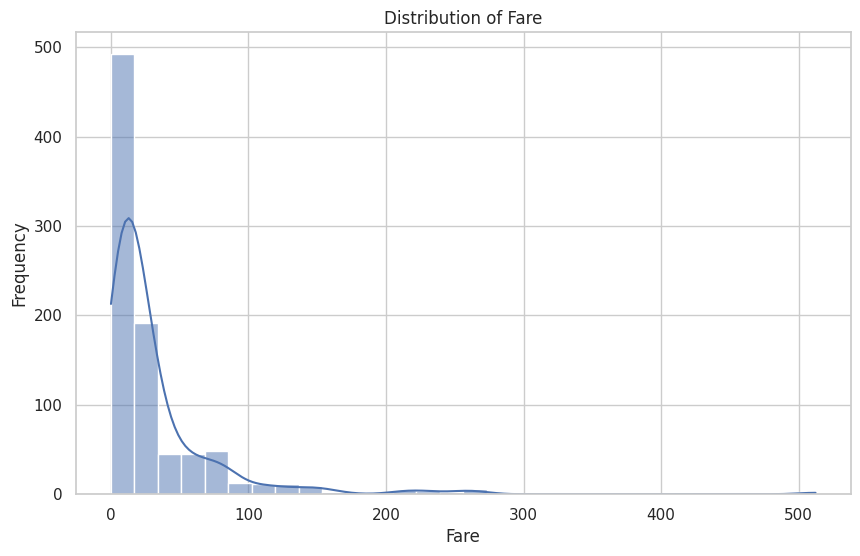

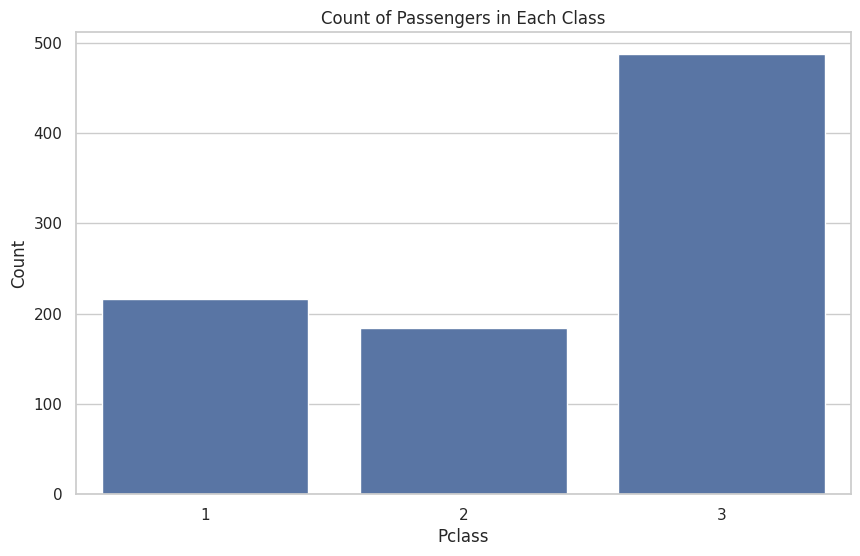

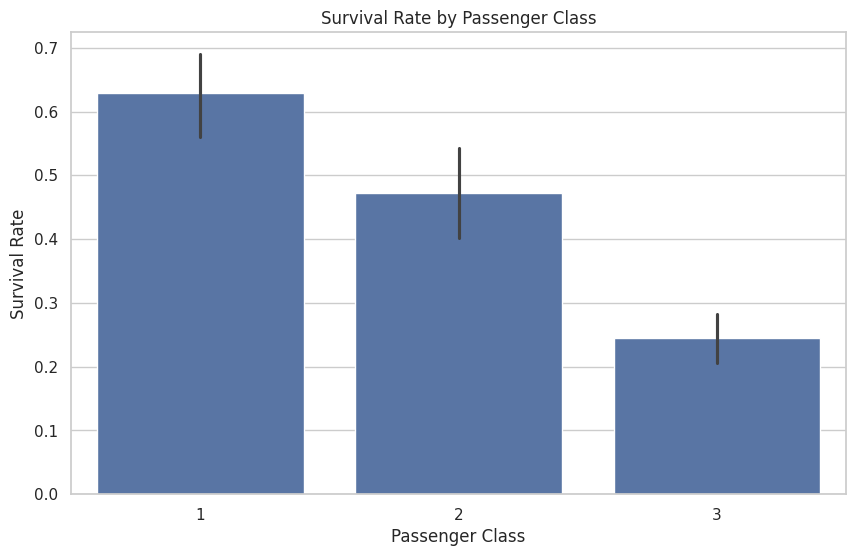

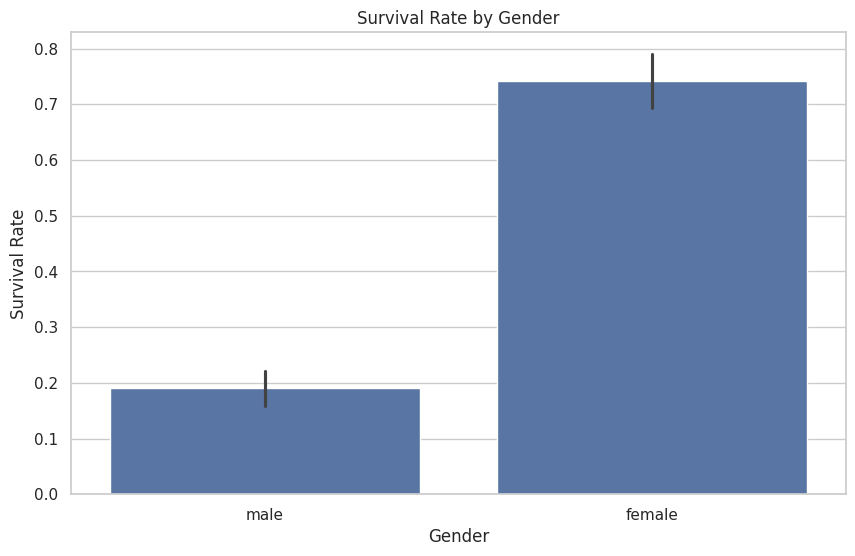

'Embarked' column not found, unable to plot Survival Rate by Port of Embarkation


ValueError: could not convert string to float: 'Mr. Owen Harris Braund'

<Figure size 1200x800 with 0 Axes>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic = pd.read_csv(url)

# Display the first few rows of the dataset
print(titanic.head())

# Verify column names
print("Column names in the dataset:")
print(titanic.columns)

# Check for missing values
print("Missing values in the dataset:")
print(titanic.isnull().sum())

# Fill missing values in 'Age' with the median age
if 'Age' in titanic.columns:
    titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# Check if 'Embarked' column exists and handle missing values
if 'Embarked' in titanic.columns:
    titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
else:
    print("'Embarked' column not found in the DataFrame")

# Drop the 'Cabin' column due to too many missing values
if 'Cabin' in titanic.columns:
    titanic = titanic.drop(columns=['Cabin'])

# Verify the changes
print("Missing values after cleaning:")
print(titanic.isnull().sum())

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot the distribution of the 'Age' feature
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Count plot for 'Pclass'
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=titanic)
plt.title('Count of Passengers in Each Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Survival rate based on 'Pclass'
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate based on 'Sex'
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate based on 'Embarked'
if 'Embarked' in titanic.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Embarked', y='Survived', data=titanic)
    plt.title('Survival Rate by Port of Embarkation')
    plt.xlabel('Port of Embarkation')
    plt.ylabel('Survival Rate')
    plt.show()
else:
    print("'Embarked' column not found, unable to plot Survival Rate by Port of Embarkation")

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  
Column names in the dataset:
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spo

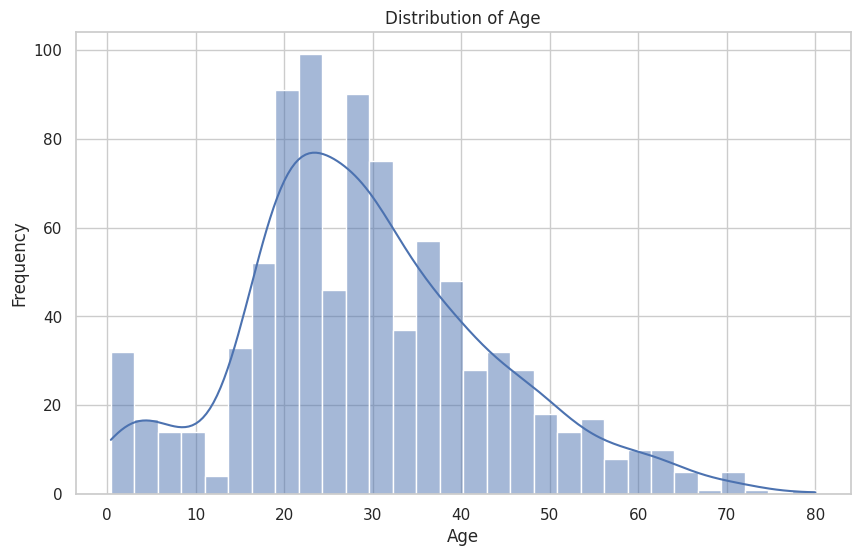

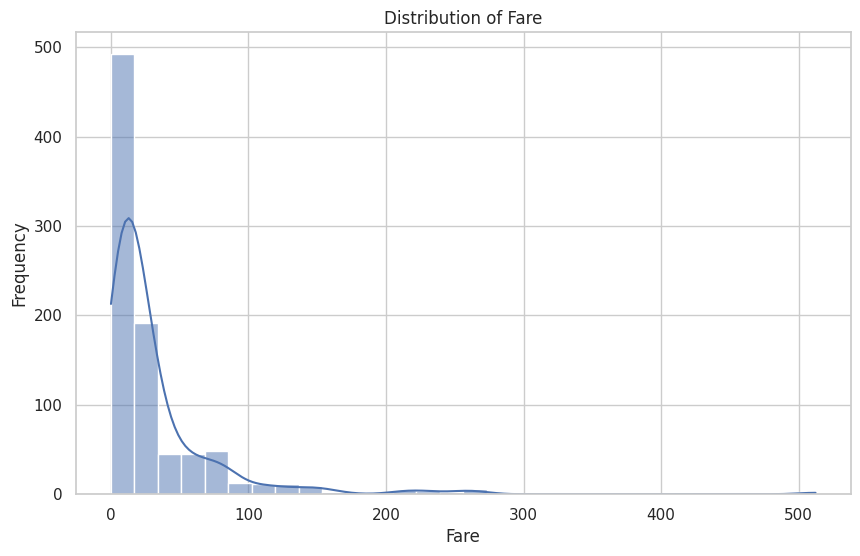

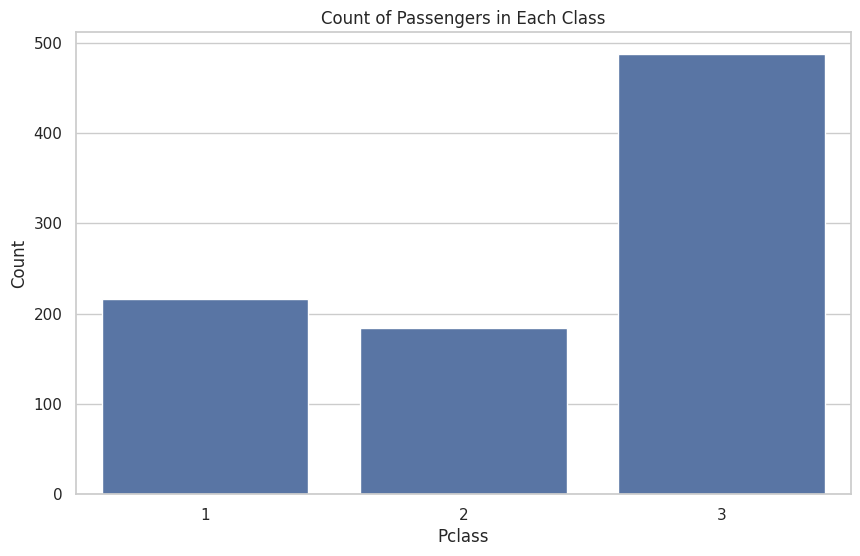

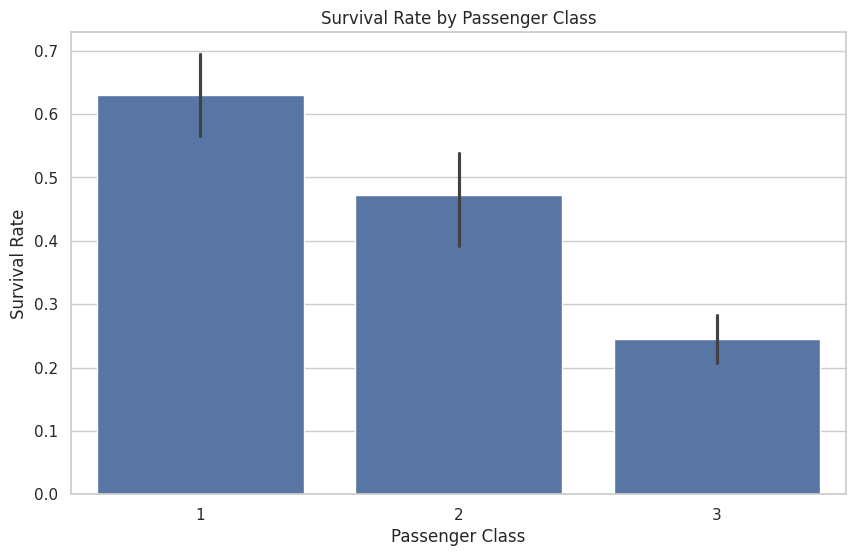

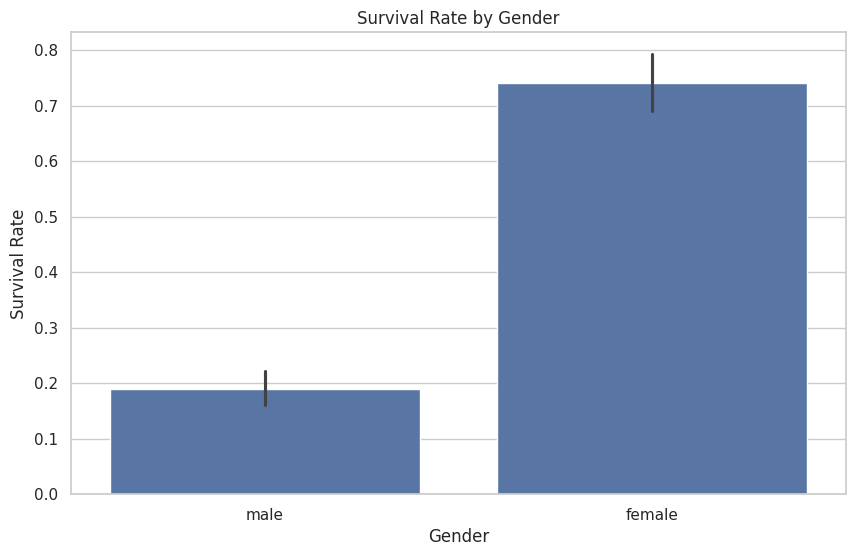

'Embarked' column not found, unable to plot Survival Rate by Port of Embarkation


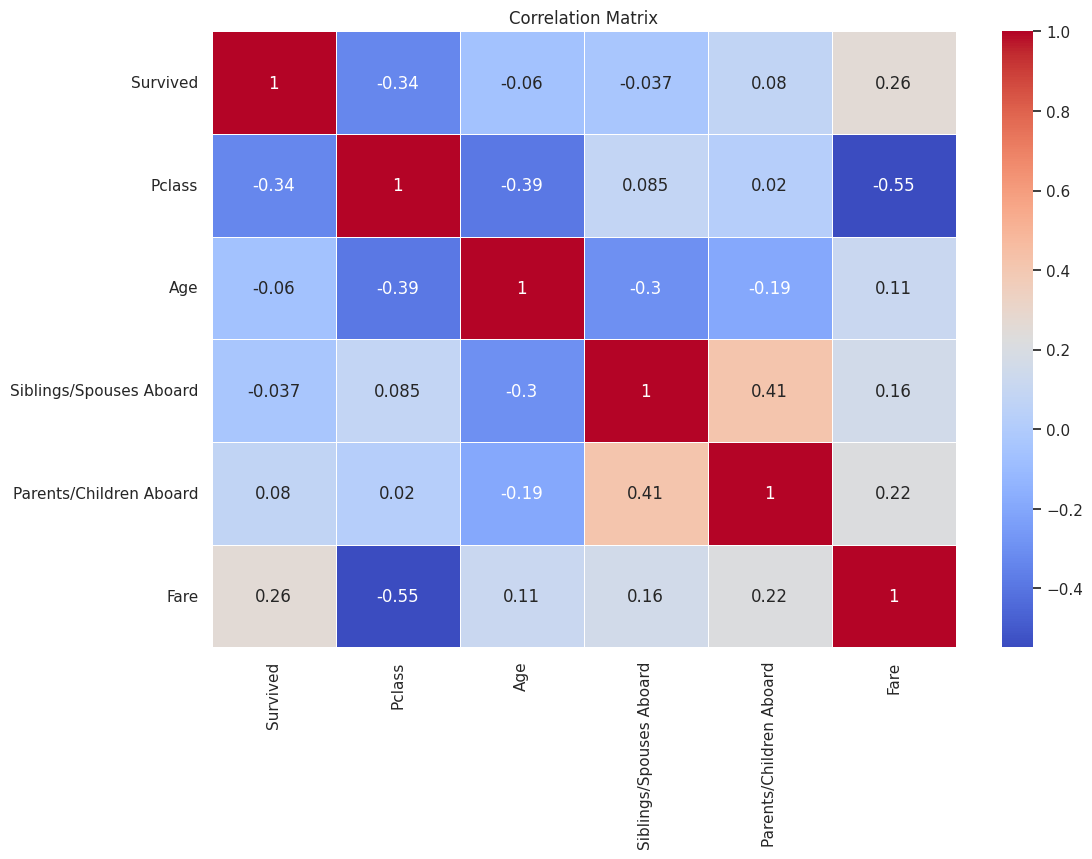

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic = pd.read_csv(url)

# Display the first few rows of the dataset
print(titanic.head())

# Verify column names
print("Column names in the dataset:")
print(titanic.columns)

# Check for missing values
print("Missing values in the dataset:")
print(titanic.isnull().sum())

# Fill missing values in 'Age' with the median age
if 'Age' in titanic.columns:
    titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# Check if 'Embarked' column exists and handle missing values
if 'Embarked' in titanic.columns:
    titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
else:
    print("'Embarked' column not found in the DataFrame")

# Drop the 'Cabin' column due to too many missing values
if 'Cabin' in titanic.columns:
    titanic = titanic.drop(columns=['Cabin'])

# Verify the changes
print("Missing values after cleaning:")
print(titanic.isnull().sum())

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot the distribution of the 'Age' feature
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Count plot for 'Pclass'
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=titanic)
plt.title('Count of Passengers in Each Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Survival rate based on 'Pclass'
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate based on 'Sex'
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate based on 'Embarked'
if 'Embarked' in titanic.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Embarked', y='Survived', data=titanic)
    plt.title('Survival Rate by Port of Embarkation')
    plt.xlabel('Port of Embarkation')
    plt.ylabel('Survival Rate')
    plt.show()
else:
    print("'Embarked' column not found, unable to plot Survival Rate by Port of Embarkation")

# Select numerical columns for the correlation matrix
numerical_cols = titanic.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = titanic[numerical_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
